<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Junwei He
- Nombre de alumno 2:Sofia Capibara


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [140]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [141]:
!pip install xgboost

In [142]:

import pandas as pd
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical features:", numerical_cols)
print("Categorical features:", categorical_cols)

Numerical features: ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
Categorical features: []


In [143]:

numerical_cols.remove('Diabetes')


In [144]:

print(df.isnull().sum())
print(df.dtypes)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64
Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP 

In [145]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report



# Determine transformations based on exploration (example)
categorical_features = [] # Add categorical features if any

# Create transformers
numerical_transformer = MinMaxScaler()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ],
    verbose_feature_names_out=False
).set_output(transform='pandas')

# Define target and features
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=555)

# Create and train the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     11708
         1.0       0.73      0.78      0.75     11856

    accuracy                           0.74     23564
   macro avg       0.74      0.74      0.74     23564
weighted avg       0.74      0.74      0.74     23564



#¿Es acaso un buen predictor de diabetes?

No es un buen predictor considerando que su recall es de 0.7, con lo que 3 de cada 10 consultantes no serán clasificados como diabéticos aunque lo sean.

#¿Qué buscan explicar las métricas utilizadas?

Precision: Indica cuántos de los clasificados como positivos realmente lo son (TP / (TP +FP))
Recall: Mide cuántos de los casos positivos son correctamente clasificados (TP / (TP + FN)), en este caso, cuántos diabéticos son detectados por el modelo.

Accuracy: Calcula cuántas predicciones fueron correctas en el total del dataset.

F1-score: Es el promedio armónico de precisión y recall, es un balance entre ambos. Es útil para ponderar ambas métricas y entrega mejores resultados que accuracy para clases desbalanceadas.


#¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

No completamente. Estas métricas son útiles para evaluar la calidad de las predicciones del modelo, pero no indican directamente si se está utilizando el conjunto óptimo de features. Un modelo puede obtener una buena precisión, recall y F1-score incluso si algunas características irrelevantes están presentes, ya que estas métricas no reflejan el impacto de cada característica individual en el rendimiento del modelo.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

<Figure size 1000x600 with 0 Axes>

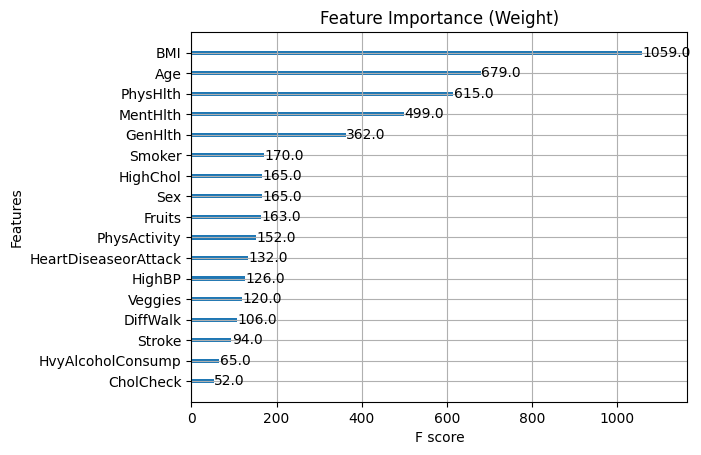

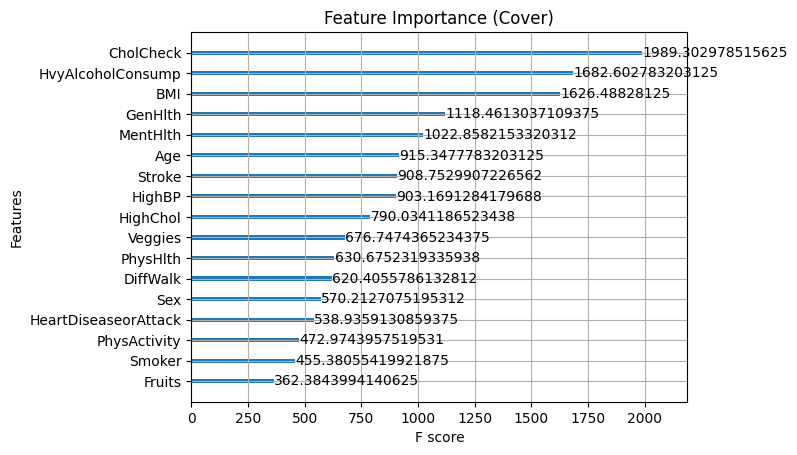

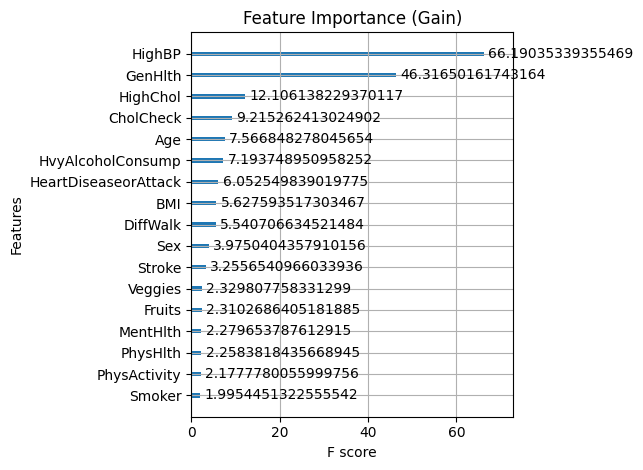

In [146]:

import matplotlib.pyplot as plt
import xgboost

model = pipeline.named_steps['classifier']

plt.figure(figsize=(10, 6))
xgboost.plot_importance(model, importance_type='weight')
plt.title('Feature Importance (Weight)')

xgboost.plot_importance(model, importance_type='cover')
plt.title('Feature Importance (Cover)')

xgboost.plot_importance(model, importance_type='gain')
plt.title('Feature Importance (Gain)')

plt.tight_layout()
plt.show()



Los resultados son compatibles debido a que son distintos criterios para medir la importancia de cada feature, según la documentación:
* ‘weight’: the number of times a feature is used to split the data across all trees.

* ‘gain’: the average gain across all splits the feature is used in.

* ‘cover’: the average coverage across all splits the feature is used in.

Por lo tanto, una variable que se usa muy frecuentemente para segmentar un árbol puede ser muy importante para weight, aunque aporte poca información, mientras que una variable que aporta mucha información puede ser importante para gain, aunque se utilice menos veces

En este caso notamos que los resultados difieren en cada criterio compartiendo muy pocas features entre criterios, como BMI entre weight y cover o GenHealth en el top 5 de los 3. Como era de esperarse, cover y weight son más similares entre sí que gain con cualquiera de ellos.


Esta información de por sí no es suficiente para interpretar correctamente, puesto que muestran la importancia general de las variables, cuánto inciden, pero no cómo, no entregan información sobre su efecto positivo o negativo en favor de la diabetes, así como tampoco interacciones entre variables.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [ ]:


import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

def permutation_importance_metric(pipeline, X_test, y_test, n_repeats=30, random_state=455):
    result = permutation_importance(pipeline, X_test, y_test, n_repeats=n_repeats, random_state=random_state)
    return result

permutation_result = permutation_importance_metric(pipeline, X_test, y_test)

feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
sorted_idx = permutation_result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(permutation_result.importances[sorted_idx].T, vert=False,
            labels=feature_names[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

std = permutation_result.importances_std
for i, feature_name in enumerate(feature_names):
  print(f"Feature: {feature_name}, Std: {std[i]}")



#¿Cómo mide la importancia de las features su propuesta? (1 punto)

La importancia de permutación mide la relevancia de cada variable en un modelo al evaluar cuánto afecta su desempeño cuando se permutan aleatoriamente sus valores en el conjunto de prueba. Si una variable es importante, su permutación reducirá el rendimiento del modelo al romper su relación con la variable objetivo. La disminución en la métrica de rendimiento (como precision, F1 o ECM) indica la importancia de la feature: a mayor reducción en el rendimiento, es más importante.

#¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)

GenHlth: Esto tiene sentido, ya que el estado de salud general suele estar fuertemente correlacionado con la mayoría de los problemas de salud.

BMI: El BMI es un buen indicador de la salud metabólica y se asocia con condiciones como diabetes y enfermedades cardiovasculares.

Age:A medida que las personas envejecen, aumenta el riesgo de desarrollar enfermedades relacionadas con el estilo de vida y el metabolismo.

HighBP (Alta presión arterial): La hipertensión es un factor de riesgo importante para enfermedades como la diabetes, los ataques cardíacos y otras condiciones crónicas.

HighChol (Colesterol alto): El colesterol alto es un factor de riesgo significativo para enfermedades cardiovasculares y diabetes.

#¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)

En general se condicen con los resultados de importancia por gainm dentro del top 5 de gain están GenHlth, BMI, HighBP y HighChol, el único que queda fuera es Age. Por otro lado, el top 5 de variables de mayor importancia por weight sólo incluye GenHlth, BMI y Age, a la vez que el top 5 por cover apenas incluye GenHlth y BMI.

Por lo tanto el criterio por gain parece ser una mejor opción que los otros en cuanto a la información que aporta.

#Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

Ventajas:
* Interpretación directa del impacto en el rendimiento del modelo

* Método agnóstico del modelo: La importancia de permutación puede aplicarse a cualquier tipo de modelo (regresiones, redes neuronales, árboles, etc.), lo que la hace muy versátil.

* Considera interacciones y relaciones no lineales: Este método captura el impacto de las variables incluso si sus efectos son no lineales o si existen interacciones complejas,

Desventajas:
* Computacionalmente costoso: Permutar cada variable y medir el impacto en el rendimiento requiere múltiples evaluaciones del modelo, lo cual puede ser lento, sobre todo para datasets grandes, modelos grandes o modelos complejos de entrenar.

* Sensibilidad a la correlación entre variables: Si hay alta colinealidad entre features, la permutación de una puede afectar el rendimiento del modelo de forma no intuitiva, ya que la información de una variable correlacionada ya está parcialmente incluida en otra.

* Dependencia de la métrica de rendimiento: La importancia de permutación depende de la métrica, lo cual puede hacer que las interpretaciones varíen y puedan conducir a errores en caso de no elegir la métrica adecuada para el problema.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [ ]:
!pip install shap

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap

explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])
shap_values = explainer(X_test)
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_values_df

Cada número representa la contribución de su feature a la predicción final de la diabetes del paciente. El valor SHAP indica la contribución de cada feature a la predicción tanto en magnitud (grado de influencia) como en dirección (positiva o negativa respecto al valor base). Su magnitud refleja la importancia de la feature para la predicción y su signo si aumenta o disminuye el valor base

\* Decimos que contribuye o aumenta la probabilidad no como causalidad de la enfermedad sino por su contribución a la predicción (pueden ser variables correlacionadas con diabetes, sin necesariamente ser causales)

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [ ]:
shap.plots.waterfall(shap_values[1])


In [ ]:
instance_id = 1
features = X_test.iloc[[instance_id], :]
shap_value = shap_values[instance_id]
shap.force_plot(
    explainer.expected_value,
    shap_value.values,
    features,
    matplotlib=True,
    link="logit"
)

In [ ]:
shap.plots.waterfall(shap_values[9])

In [ ]:
instance_id = 9
features = X_test.iloc[[instance_id], :]
shap_value = shap_values[instance_id]
shap.force_plot(
    explainer.expected_value,
    shap_value.values,
    features,
    matplotlib=True,
    link="logit"
)

In [ ]:
shap.plots.waterfall(shap_values[150])

In [ ]:
instance_id = 150
features = X_test.iloc[[instance_id], :]
shap_value = shap_values[instance_id]
shap.force_plot(
    explainer.expected_value,
    shap_value.values,
    features,
    matplotlib=True,
    link="logit"
)

Vemos que en general:
* GenHealth en general aumenta la diabetes
* HighBP aumenta cuando está presente y reduce cuando no.
* Smoker reduce cuando está presente.
* Veggies reduce cuando está presente y aumenta cuando no
* HighChol la reduce cuando no está presente
* HeartOrDiseaseAttack: aumenta la diabetes cuando hay antecedentes, reduce cuando no
* Para edades de 4 y 7 aumenta, para 11 disminuye, por lo que podría podría ocurrir que el aumento de la edad aumente la diabetes,

Sin embargo hay features que no muestran un comportamiento transversal, como fruits que aumenta la diabetes para 0 y 1

No es posible generalizar estos resultados a todo el dataset viendo únicamente 3 instancias, sin embargo hay variables que  
presentan contribuciones compatibles entre las 3 instancias, como con GenHealth contribuyendo fuertemente a favor, y variables con comportamientos irregulares.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [ ]:
shap.plots.bar(shap_values, max_display=17)

In [ ]:
shap.summary_plot(shap_values, X_test)

* GenHlth: aumenta la probabilidad de diabetes, tanto para valores bajos como altos.
* BMI: puede contribuir en ambas direcciones, para valores bajos y altos. Es la variable que puede presentar las mayores contribuciones a la predicción.
* HighBP: para valores 0 reduce y para valores 1 aumenta, presenta separación clara.
* Smoker: contribuye negativamente a la diabetes cuando es 1, cuando es 0 tiene el efecto contrario, presenta separación clara.
* Veggies: reduce la diabetes cuando es 1, cuando es 0 tiene el efecto inverso, presenta separación clara.
* Age: no presenta una separación o efecto constante, en general aumenta levemente, pero también hay casos en que la reduce para edades altas y bajas.
* HighChol: para valores 1 aumenta la probabilidad de diabetes, para valores 0 lo contrario, con una separación clara entre ambos casos.
* PhysHlt: para valores bajos casi no contribuye a la predicción, para algunos valores, tanto bajos como altos, puede contribuir a la diabetes.
* MentHlt: para valores bajos y altos no presenta grandes aportes
* HeartDeseaseorAttack: en caso de no presentar antecedentes realiza una mínima contribución en contra de la diabetes, sin embargo, cuando hay antecedentes presenta una contribución mayor a favor de la diabetes.
* Sex:  cuando es 1 contribuye levemente, en caso contrario reduce levemente la diabetes.
* Fruits: presenta una baja contribución en distintas direcciones para ambos valores posibles.
* DiffWalk: muy baja contribución, pero positiva para valores bajos y negativa para valores altos.
* CholCheck: cuando es 0 reduce la diabetes, cuando es 1 no tiene efecto.
* PhysActivity: aportes muy menores en ambas direcciones para ambos valores posibles.
* Stroke: cuando está presente (1) generalmente aumenta la diabetes, cuando no (0) tiene efectos irrelevantes.
* HvyAlcoholConsump: cuando está presente reduce la diabetes.

Una diferencia con el análisis anterior es notar que el comportamiento de la diabetes respecto a la edad no está claramente separado, hay un aporte positivo para valores menores y mayores y, en menor magnitud, aportes negativos para valores menores y mayores.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

# Revisamos las features
feature_importance_names

In [ ]:
n= 5
top_features = feature_importance_names[:n]


for name in top_features:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                       color=shap_values, xmin=0)


* GenHlt: para los distintos valores tiene un comportamiento similar, con un aporte positivo, y en general cuando DiffWalk es 1 GenHlth tiene menor magnitud.

* BMI tiene un comportamiento heterogéneo en todo su rango de valores, tanto en magnitud como sentido de su influencia en la variable diabetes. En general,cuando la persona es fumadora tiene aportes negativos, pero cuando no lo es tiende a tener aportes negativos.

* HighBP: cuando es 0 reduce la diabetes y cuando es 1 la aumenta, la magnitud de su contribución en 0 es menor a la magnitud de su contribución positiva en 1. Además, cuando hay presencia de HeartDiseaseOrAttack, HighBP tiende a tener menor magnitud.

* Smoker: tiene un impacto de magnitud similar en 0 y 1, en el primer caso es positiva y en el segundo negativa. Generalmente un aumento de MentHlth aumenta la magnitud del impacto de Smoker en ambos casos.

* Veggies: cuando es 1 tiene un aporte negativo que es de menor magnitud (en general) que el aporte positivo cuando es 0. En caso de que la persona sea fumadora el efecto de ser veggie se reduce en magnitud.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

X_test_sample = X_test.sample(n=1000, random_state=42)

for feature in top_features:
  PartialDependenceDisplay.from_estimator(
      pipeline,
      X_test_sample,
      features=[feature],
      kind="average",
      subsample=100,
      n_jobs=2,
      grid_resolution=20,
      random_state=0
  )
  plt.title(f"Partial Dependence Plot for {feature}")
  plt.show()

 Interpretación de los resultados
 - GenHlth: A medida que aumenta el GenHlth, el modelo predice una mayor probabilidad de diabetes, siempre crece.
 - BMI: similar al caso anterior, sin embargo, el crecimiento esta vez es más intestable-
 - HighBP: Al ser una variable binaria la recta es perfecta. Cuando hay HighBP aumenta la probabilidad de tener diabeteres según el modelo.
 - Smoker: Análogo al caso anterior.
 - Veggies: El único caso en que disminuye la probabilidad de ser diabético, al ser una variable binaria no hay puntos intermedios que analizar.


Los resultados de PDP no necesariamente son generalizables, puesto que asumen una independencia entre variables que, en este caso, a priori no podemos asegurar, puesto que fumar o ser vegetariano puede estar correlacionado con las otras variables como HighBP.


## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

# Retrospectiva... (10 puntos)

In [ ]:
explainer = AnchorTabular(
    pipeline['classifier'].predict,
    X_test.columns,
    seed=12138
)

explainer.fit(X_test.values)

In [ ]:
idx = 1000
instance = X_test.iloc[[idx]]
instance_preprocessed = preprocessor.transform(instance).to_numpy()
explanation_1000 = explainer.explain(instance_preprocessed)
pred = explainer.predictor(instance_preprocessed)
print('Prediction:')
print(pred)
print('Rules:')
print(' & '.join(explanation_1000.anchor))
print('Precision:')
print(explanation_1000.precision)
print('Coverage')
coverage = explanation_1000.coverage
print(f'{coverage}%')
print(f'{int(coverage * len(X))} of {len(X)}')


In [ ]:
idx = 3001
instance = X_test.iloc[[idx]]
instance_preprocessed = preprocessor.transform(instance).to_numpy()
explanation_1000 = explainer.explain(instance_preprocessed)
pred = explainer.predictor(instance_preprocessed)
print('Prediction:')
print(pred)
print('Rules:')
print(' & '.join(explanation_1000.anchor))
print('Precision:')
print(explanation_1000.precision)
print('Coverage')
coverage = explanation_1000.coverage
print(f'{coverage}%')
print(f'{int(coverage * len(X))} of {len(X)}')


In [ ]:
idx = 5751
instance = X_test.iloc[[idx]]
instance_preprocessed = preprocessor.transform(instance).to_numpy()
explanation_1000 = explainer.explain(instance_preprocessed)
pred = explainer.predictor(instance_preprocessed)
print('Prediction:')
print(pred)
print('Rules:')
print(' & '.join(explanation_1000.anchor))
print('Precision:')
print(explanation_1000.precision)
print('Coverage')
coverage = explanation_1000.coverage
print(f'{coverage}%')
print(f'{int(coverage * len(X))} of {len(X)}')


La primera regla tiene sentido considerando la precisión y la pequeña cantidad de variables utilizadas, con su consecuente cobertura amplia. Sin embargo, las demás reglas disminuyen considerablemente la precision y el coverage de los datos, lo que no es un buen indicador considerando el problema aborado.

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

Los métodos agnósticos locales son mejores en cuanto a la información que proveen sobre la predicción de diabetes, en este sentido cabe destar la posibilidad que entrega SHAP de analizar la contribución en sentido y magnitud de cada variable, así como su interacción, lineal o no, con la variable que el modelo considera más relevante o con la que escojamos. Esto permite analizar las variables más relevantes, entender cuánto y cómo afectan la predicción, junto con cómo interactúan con el resto.

Sin embargo lo anterior, el método de permutación también es interesante, sólo que en este caso el análisis de variables es más rico en SHAP.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>